In [1]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the iris dataset from Scikit-learn
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Map target numbers to species names
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display the first few rows
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [3]:
import pandas as pd

# Load the dataset from a CSV file
df = pd.read_csv('/content/Iris.csv')

# Display the first few rows
print(df.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


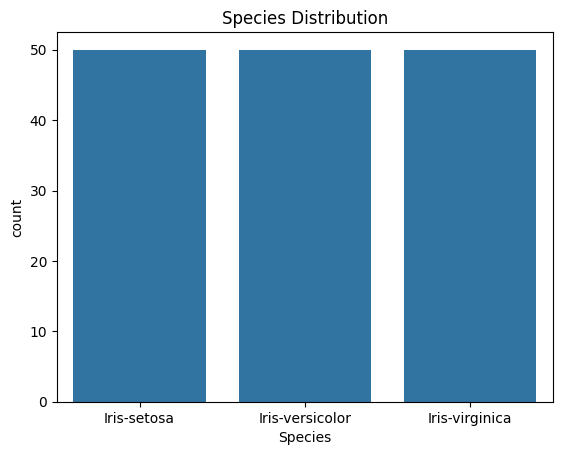

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualize species distribution
sns.countplot(x='Species', data=df)
plt.title('Species Distribution')
plt.show()


In [7]:
from sklearn.preprocessing import LabelEncoder

# Encode the species
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])


In [8]:
from sklearn.model_selection import train_test_split

X = df.drop('Species', axis=1)
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the classifier
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [10]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Classification report
print(classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 100.00%
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



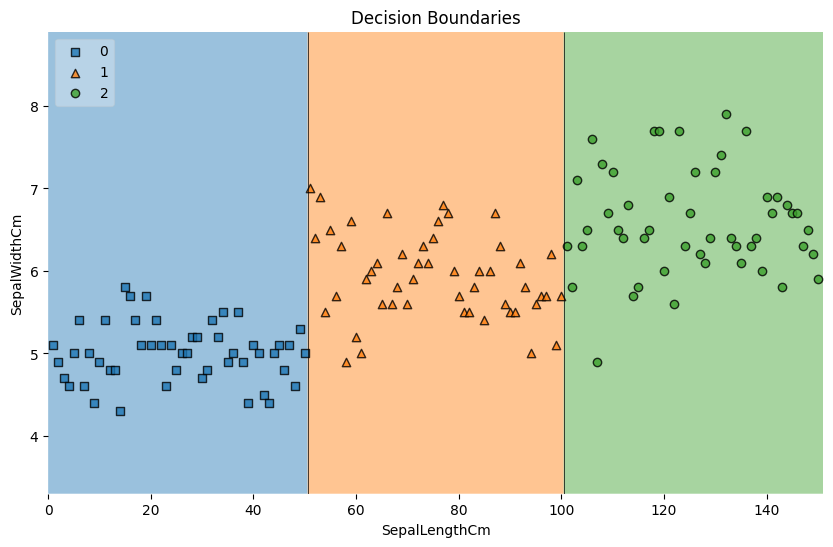

In [13]:
from mlxtend.plotting import plot_decision_regions

# Use only the first two features for plotting
X_plot = X.iloc[:, :2].values
y_plot = y.values

# Train the model on the first two features
model.fit(X_plot, y_plot)

# Plot decision regions
plt.figure(figsize=(10, 6))
plot_decision_regions(X_plot, y_plot, clf=model, legend=2)
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.title('Decision Boundaries')
plt.show()


In [12]:
from sklearn.model_selection import GridSearchCV

# Example: Hyperparameter tuning for Decision Tree
param_grid = {
    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': None, 'min_samples_split': 2}
